In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
import calendar
from dateutil.relativedelta import *

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [3]:
frames = [pd.read_csv('../data/transactions_1.csv', index_col=0), pd.read_csv('../data/transactions_2.csv', index_col=0)]
# frames = [pd.read_csv('../data/transactions_1.csv', index_col=0)]
df = pd.concat(frames)
df['date'] = pd.to_datetime(df['date'])
df.sort_values('date')

,customer_id,product_id,date
657826,8752181,G5HEPH9A2T,2017-01-01 08:32:26.307000+00:00
658033,8752181,RZ1BJ9ZV9C,2017-01-01 08:38:15.207000+00:00
755034,7269786,G5HEPH9A2T,2017-01-01 11:29:18.527000+00:00
755319,7269786,FA7OOL7Z3T,2017-01-01 11:59:30.613000+00:00
659733,5255027,FA7OOL7Z3T,2017-01-01 15:22:46.793000+00:00
...,...,...,...
294947,1971440,GJROWT9RPV,2020-03-16 23:29:31.810000+00:00
104192,8350659,G5HEPH9A2T,2020-03-16 23:54:22.647000+00:00
104658,8350659,XZ6UVEYK40,2020-03-16 23:58:40.210000+00:00
103766,8350659,GJROWT9RPV,2020-03-17 00:07:18.663000+00:00


# Questions
## 1. Create an ordered (descending) plot that shows the total number of transactions per customer from the most active customer to the least active one.

In [8]:
count_df = df.groupby(['customer_id'])['product_id'].count().reset_index(name="count").sort_values('count')
count_df.to_csv('../data/customer_trans.csv')

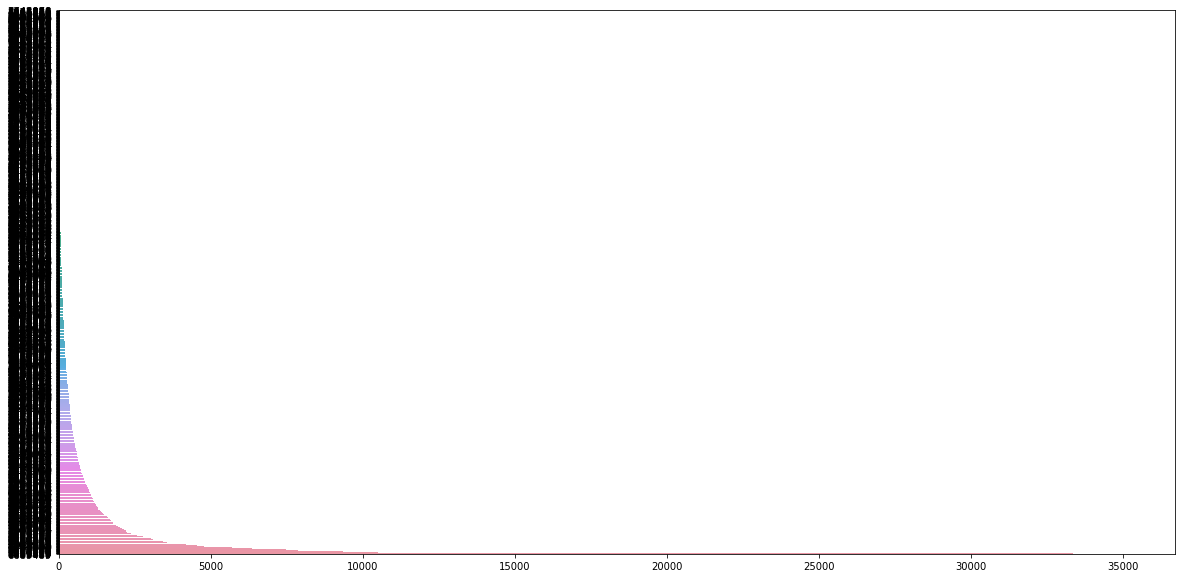

In [11]:
x = count_df.customer_id.astype(str).values
y = count_df['count'].values
plt.figure(figsize=(20, 10))
sns.barplot(y, x)
plt.show()

## 2. Given any product ID, create a plot to show its transaction frequency per month for the year 2018.

In [15]:
product_per_month_df = df.groupby(['product_id', pd.Grouper(freq='M', key='date', closed='left')])['product_id'].count().unstack(fill_value=0)
product_per_month_df.to_csv('../data/product_per_month.csv')
product_per_month_df

date,2017-01-31 00:00:00+00:00,2017-02-28 00:00:00+00:00,2017-03-31 00:00:00+00:00,2017-04-30 00:00:00+00:00,2017-05-31 00:00:00+00:00,2017-06-30 00:00:00+00:00,2017-07-31 00:00:00+00:00,2017-08-31 00:00:00+00:00,2017-09-30 00:00:00+00:00,2017-10-31 00:00:00+00:00,...,2019-06-30 00:00:00+00:00,2019-07-31 00:00:00+00:00,2019-08-31 00:00:00+00:00,2019-09-30 00:00:00+00:00,2019-10-31 00:00:00+00:00,2019-11-30 00:00:00+00:00,2019-12-31 00:00:00+00:00,2020-01-31 00:00:00+00:00,2020-02-29 00:00:00+00:00,2020-03-31 00:00:00+00:00
product_id,,,,,,,,,,,,,,,,,,,,,
0A4G5LZWCP,814,3860,4484,2050,4743,4737,3243,2932,4116,5043,...,1210,1363,1057,899,1451,1332,679,777,556,328
0AB7PTAD3X,18,131,110,84,401,204,446,164,183,91,...,47,149,101,30,151,6,42,16,4,36
0HLIWH0CA1,625,1591,2119,1317,1931,1925,1832,1207,1254,1709,...,718,707,444,531,746,636,391,290,403,198
0UZVWTQ50H,0,0,0,0,0,0,0,0,7,0,...,0,0,0,0,0,0,0,0,0,0
0W3289OYXV,37,140,172,11,2,3,38,61,0,76,...,0,0,0,0,0,0,0,0,0,0
2O4Z94LNOH,11,34,3,39,2,6,40,0,23,4,...,5,39,99,48,6,3,11,10,75,25
5PCWS3EUMP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,0,0
5Q7TNFLZP0,17,2,11,4,0,111,0,0,0,1,...,3,0,0,0,0,0,1,0,1,0
5RPSDK28JR,2138,7051,8804,5290,8524,11770,11488,6747,9203,12901,...,3877,3897,2343,2517,4315,2786,1455,1847,1706,648


In [38]:
filtered_2018_df = product_per_month_df.loc[:, product_per_month_df.columns.to_series().between('2018-01-01', '2019-01-01')]
filtered_2018_df

date,2018-01-31 00:00:00+00:00,2018-02-28 00:00:00+00:00,2018-03-31 00:00:00+00:00,2018-04-30 00:00:00+00:00,2018-05-31 00:00:00+00:00,2018-06-30 00:00:00+00:00,2018-07-31 00:00:00+00:00,2018-08-31 00:00:00+00:00,2018-09-30 00:00:00+00:00,2018-10-31 00:00:00+00:00,2018-11-30 00:00:00+00:00,2018-12-31 00:00:00+00:00
product_id,,,,,,,,,,,,
0A4G5LZWCP,915,791,651,514,1515,2070,1933,1126,1962,3801,2953,3181
0AB7PTAD3X,42,64,27,35,115,81,162,120,69,147,167,29
0HLIWH0CA1,330,667,622,481,905,1384,996,1042,1470,2353,1825,1876
0UZVWTQ50H,0,0,0,0,0,0,0,0,0,0,0,0
0W3289OYXV,4,0,0,0,12,68,27,63,3,0,8,0
2O4Z94LNOH,4,1,48,0,3,21,1,2,2,169,13,39
5PCWS3EUMP,0,0,0,0,0,0,0,0,0,0,0,0
5Q7TNFLZP0,2,44,4,1,14,35,2,111,53,1,1,0
5RPSDK28JR,1758,2902,3215,2199,5029,6138,5147,3342,4377,8169,6346,8415


In [39]:
filtered_2018_df.columns = list(map(lambda x: calendar.month_abbr[x.month], filtered_2018_df.columns))
filtered_2018_df.to_csv('../data/2018_product_per_month.csv')
filtered_2018_df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
product_id,,,,,,,,,,,,
0A4G5LZWCP,915,791,651,514,1515,2070,1933,1126,1962,3801,2953,3181
0AB7PTAD3X,42,64,27,35,115,81,162,120,69,147,167,29
0HLIWH0CA1,330,667,622,481,905,1384,996,1042,1470,2353,1825,1876
0UZVWTQ50H,0,0,0,0,0,0,0,0,0,0,0,0
0W3289OYXV,4,0,0,0,12,68,27,63,3,0,8,0
2O4Z94LNOH,4,1,48,0,3,21,1,2,2,169,13,39
5PCWS3EUMP,0,0,0,0,0,0,0,0,0,0,0,0
5Q7TNFLZP0,2,44,4,1,14,35,2,111,53,1,1,0
5RPSDK28JR,1758,2902,3215,2199,5029,6138,5147,3342,4377,8169,6346,8415


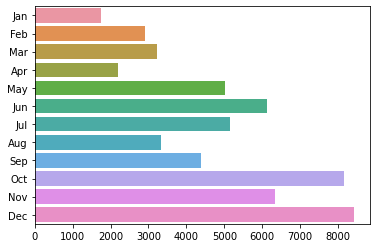

In [40]:
def plot_product_per_mouth(product_id: str):
    assert product_id in filtered_2018_df.index.values, 'product_id does not exist.'

    counts_per_months = filtered_2018_df.loc[product_id]

    sns.barplot(counts_per_months.values, counts_per_months.index.values)
    plt.show()

plot_product_per_mouth('5RPSDK28JR')

*Question #3* has been answerd in prediction notebook
## 4. At any time, what are the top 5 products that drove the highest sales over the last six months? Do you see a seasonality effect in this data set?

In [65]:
transactions_per_month_df = df.groupby([pd.Grouper(freq='M', key='date', closed='left'), 'product_id'])['product_id'].count().unstack(fill_value=0)
transactions_per_month_df

product_id,0A4G5LZWCP,0AB7PTAD3X,0HLIWH0CA1,0UZVWTQ50H,0W3289OYXV,2O4Z94LNOH,5PCWS3EUMP,5Q7TNFLZP0,5RPSDK28JR,7JJJCPI5I1,...,WLD5DLYFB0,WS7C94TZ6U,X7R6XY5T33,XD4I34ED7F,XZ6UVEYK40,YRRT480XIZ,Z4N23EOA13,Z6OHD7VB3J,ZH8YQX1ZL2,ZWL2RHU5YP
date,,,,,,,,,,,,,,,,,,,,,
2017-01-31 00:00:00+00:00,814,18,625,0,37,11,0,17,2138,11,...,12,0,0,734,604,74,431,0,18,140
2017-02-28 00:00:00+00:00,3860,131,1591,0,140,34,0,2,7051,0,...,26,1,0,1394,1397,17,1928,0,295,362
2017-03-31 00:00:00+00:00,4484,110,2119,0,172,3,0,11,8804,0,...,17,28,0,1592,3121,126,1660,0,223,786
2017-04-30 00:00:00+00:00,2050,84,1317,0,11,39,0,4,5290,0,...,4,0,0,1300,1967,165,1017,1,334,407
2017-05-31 00:00:00+00:00,4743,401,1931,0,2,2,0,0,8524,0,...,62,0,0,1467,2355,209,1507,0,257,1126
2017-06-30 00:00:00+00:00,4737,204,1925,0,3,6,0,111,11770,0,...,133,78,0,2553,5176,46,2315,0,566,869
2017-07-31 00:00:00+00:00,3243,446,1832,0,38,40,0,0,11488,24,...,76,0,0,2176,3380,26,1926,0,407,689
2017-08-31 00:00:00+00:00,2932,164,1207,0,61,0,0,0,6747,0,...,6,92,0,2431,2670,40,2006,0,389,567
2017-09-30 00:00:00+00:00,4116,183,1254,7,0,23,0,0,9203,0,...,138,0,0,2533,3655,4,2020,0,176,466


In [75]:
date = datetime.date(2017, 4, 1)

end_date = str(date)
start_date = str(date + relativedelta(months=-6))
transactions_per_month_df[start_date:end_date].sum(axis=0).sort_values(ascending=False).head(5)

product_id
5RPSDK28JR    17993
0A4G5LZWCP     9158
FA7OOL7Z3T     6021
G5HEPH9A2T     5695
VD51ZQPY9D     5561
dtype: int64

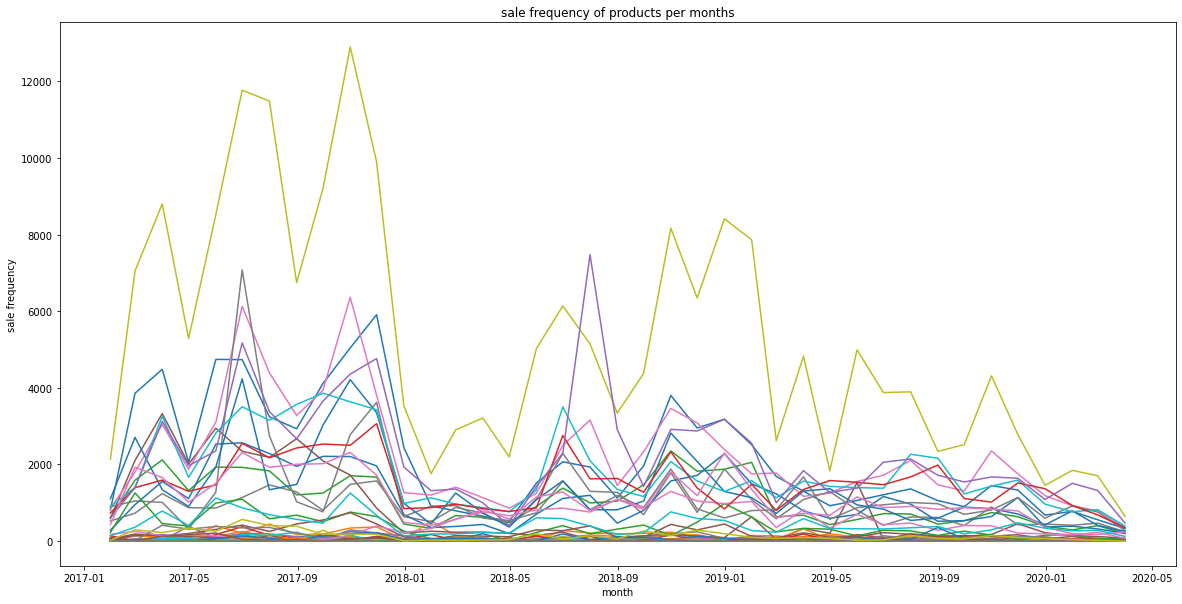

In [85]:
plt.figure(figsize=(20, 10))
for i in range(50):
    plt.plot(transactions_per_month_df.iloc[:, i])

plt.xlabel('month')
plt.ylabel('sale frequency')
plt.title('sale frequency of products per months')
plt.show()